In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split

In [2]:
# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
#loading data set
test=pd.read_csv("./test.csv")
train=pd.read_csv("./train.csv")
train_m,train_n=train.shape
print(train_m,train_n)
train["Number_Weeks_Used"].fillna(0, inplace = True)
test["Number_Weeks_Used"].fillna(0, inplace = True)
test_m,test_n = test.shape
print(test_m,test_n)
print(train.head(10))

88858 10
59310 9
          ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0  F00000001                      188          1          0   
1  F00000003                      209          1          0   
2  F00000004                      257          1          0   
3  F00000005                      257          1          1   
4  F00000006                      342          1          0   
5  F00000008                      448          0          1   
6  F00000009                      448          0          1   
7  F00000010                      577          1          0   
8  F00000012                      731          0          0   
9  F00000020                     1132          1          0   

   Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                       1                  0                0.0   
1                       1                  0                0.0   
2                       1                  0                0.0   
3                    

In [10]:
#data preprocessing 
X1 = train.drop(columns=["ID","Crop_Damage","Crop_Type","Soil_Type","Number_Weeks_Quit","Season"]) 

X = train.drop(columns=["ID","Crop_Damage"])
y = train["Crop_Damage"]
print(y)

0        0
1        1
2        1
3        1
4        1
        ..
88853    0
88854    0
88855    0
88856    0
88857    0
Name: Crop_Damage, Length: 88858, dtype: int64


In [11]:
X_train, X_vald, y_train, y_vald = train_test_split(X, y, test_size = 0.20)
X1_train, X1_vald, y_train, y_vald = train_test_split(X1, y, test_size = 0.20)

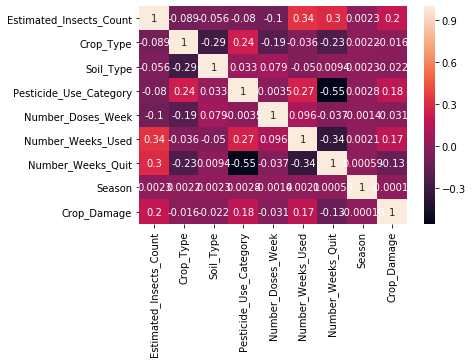

In [7]:
#correlation matrix
corrmatrix = train.corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [12]:
from xgboost import XGBClassifier

In [13]:
#XGboost
classifier2 = XGBClassifier(objective ="multi:softmax")
classifier2.fit(X1_train, y_train)

y_pred2 = classifier2.predict(X1_vald)

result2 = accuracy_score(y_vald,y_pred2)
print("Accuracy:",result2)


Accuracy: 0.8471190636957011


In [61]:
#submission 2
X_test = test.drop(columns=["ID"])
y_test = classifier2.predict(X_test)
y_test = pd.DataFrame(y_test)
y_test.to_csv("submission5.csv",index=False)


In [17]:
#XGboost
# error= ["rmse","mae","logloss","error"]  eval_metric --no use
# max_leaf=1000 meax_leaf_nodes=i*100 --no use
# depth=10 useful best at 6
# gam=10 no use

classifier2 = XGBClassifier(max_depth=6)
classifier2.fit(X1_train, y_train)

y_pred2 = classifier2.predict(X1_vald)

result2 = accuracy_score(y_vald,y_pred2)
print("Accuracy:",result2)

#0Accuracy: 0.8471753319828944

Accuracy: 0.8479068197164078


In [21]:
#submission 3
X1_test = test.drop(columns=["ID","Crop_Type","Soil_Type","Number_Weeks_Quit","Season"])
y_test = classifier2.predict(X1_test)
y_test = pd.DataFrame(y_test)
y_test.to_csv("submission5.csv",index=False)

In [16]:
#Random forest classifier
classifier1 = RandomForestClassifier(n_estimators = 300)
classifier1.fit(X1_train, y_train)

y_pred1 = classifier1.predict(X1_vald)

result1 = accuracy_score(y_vald,y_pred1)
print("Accuracy:",result1)

Accuracy: 0.8196038712581589


In [93]:
#submission 1
X_test = test.drop(columns=["ID"])
y_test = classifier1.predict(X_test)
y_test = pd.DataFrame(y_test)
y_test.to_csv("submission1.csv",index=False)


In [98]:
#Random forest classifier 2
#estimat = 10 useful best at 300

classifier3 = RandomForestClassifier(n_estimators =300,
                                                     min_samples_split=2,
                                                     max_features=5,
                                                     max_depth=15,
                                                     )
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_vald)

result3 = accuracy_score(y_vald,y_pred3)
print("Accuracy:",result3)


Accuracy: 0.8400855277965339


In [99]:
#submission 4
X_test = test.drop(columns=["ID"])
y_test = classifier3.predict(X_test)
y_test = pd.DataFrame(y_test)
y_test.to_csv("submission4.csv",index=False)


In [52]:
                
"""
2 5 5 Accuracy: 0.8387913571910871
2 5 10 Accuracy: 0.8430677470177808
2 5 15 Accuracy: 0.8440243079000675
2 6 5 Accuracy: 0.8387913571910871
2 6 10 Accuracy: 0.842955210443394
2 6 15 Accuracy: 0.8427301372946208
2 7 5 Accuracy: 0.8387913571910871
2 7 10 Accuracy: 0.8435741616025209
2 7 15 Accuracy: 0.8418298446995274
2 8 5 Accuracy: 0.8425050641458474
2 8 10 Accuracy: 0.8442493810488408
2 8 15 Accuracy: 0.8405356740940806
3 5 5 Accuracy: 0.8394665766374072
3 5 10 Accuracy: 0.8423925275714608
3 5 15 Accuracy: 0.8407607472428539
3 6 5 Accuracy: 0.8394665766374072
3 6 10 Accuracy: 0.8422237227098807
3 6 15 Accuracy: 0.8400292595093405
3 7 5 Accuracy: 0.8394665766374072
3 7 10 Accuracy: 0.8434616250281342
3 7 15 Accuracy: 0.8402543326581139
3 8 5 Accuracy: 0.841604771550754
3 8 10 Accuracy: 0.842955210443394
3 8 15 Accuracy: 0.8392415034886338
4 5 5 Accuracy: 0.8394665766374072
4 5 10 Accuracy: 0.8418298446995274
4 5 15 Accuracy: 0.8409858203916273
4 6 5 Accuracy: 0.8394665766374072
4 6 10 Accuracy: 0.8421674544226874
4 6 15 Accuracy: 0.8411546252532073
4 7 5 Accuracy: 0.8394665766374072
4 7 10 Accuracy: 0.8422237227098807
4 7 15 Accuracy: 0.8399729912221472
4 8 5 Accuracy: 0.8417173081251407
4 8 10 Accuracy: 0.8433490884537475
4 8 15 Accuracy: 0.8404231375196939
5 5 5 Accuracy: 0.8394665766374072
5 5 10 Accuracy: 0.8427864055818141
5 5 15 Accuracy: 0.8416610398379474
"""


In [106]:
#logistic regression
solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalty = ["none", "l1", "l2", "elasticnet"]
c_values = [100, 10, 1.0, 0.1, 0.01]

model = LogisticRegression()
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#Best: 0.835434 using {'C': 100, 'penalty': 'l2', 'solver': 'sag'}

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best: 0.835434 using {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.833221 (0.001282) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.835007 (0.001544) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.835429 (0.001368) with: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
0.835261 (0.001759) with: {'C': 100, 'penalty': 'none', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.833216 (0.001244) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.835251 (0.001764) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.833221 (0.001282) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.834839 (0.001719) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.833376 (0.001133) with: {'C': 10

In [ ]:
#SVM
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ["linear", "poly", "rbf", "sigmoid", "precomputed"]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train) 
print(grid.best_params_)
grid_predictions = grid.predict(X_vald)
print(classification_report(y_vald, grid_predictions))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 125 candidates, totalling 375 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
